In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [32]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [33]:
def min_max(data,column):
    data[column] = (data[column] - data[column].min())/(data[column].max() - data[column].min())
    data[column] = round(data[column],2)

In [34]:
min_max(df,'Age')

In [35]:
min_max(df,'EstimatedSalary')

In [36]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0.02,0.03,0
1,15810944,1,0.40,0.04,0
2,15668575,0,0.19,0.21,0
3,15603246,0,0.21,0.31,0
4,15804002,1,0.02,0.45,0
...,...,...,...,...,...
395,15691863,0,0.67,0.19,1
396,15706071,1,0.79,0.06,1
397,15654296,0,0.76,0.04,1
398,15755018,1,0.43,0.13,0


In [37]:
df = df.drop(columns = ['User ID'])

In [38]:
X = df.drop(columns = ['Purchased'])
y = df['Purchased']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test_scaled)

In [43]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 7 21]]


In [44]:
tn1, fp1, fn1, tp1 = cm.ravel()
print(tn1, fp1, fn1, tp1)

50 2 7 21


In [45]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred, average="binary")

In [46]:
print(accuracy,precision,recall)

0.8875 0.9130434782608695 0.75


<Axes: >

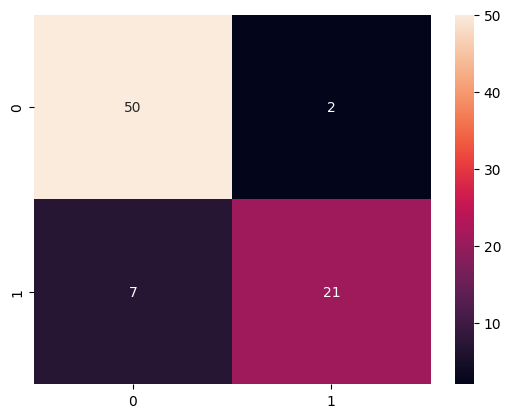

In [47]:
sb.heatmap(cm, annot = True)

In [48]:
tp = ((y_pred == 1) & (y_test == 1)).sum()
tn = ((y_pred == 0) & (y_test == 0)).sum()
fp = ((y_pred == 1) & (y_test == 0)).sum()
fn = ((y_pred == 0) & (y_test == 1)).sum()

In [49]:
print(tp,tn,fp,fn)

21 50 2 7


In [50]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [51]:
print(accuracy, precision, recall)

0.8875 0.9130434782608695 0.75


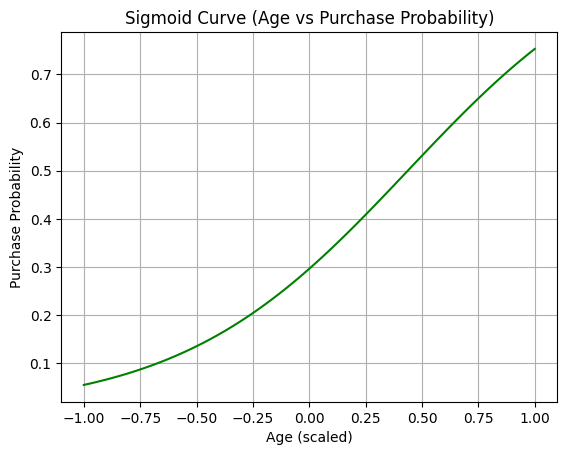

In [52]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Vary Age feature (keep Gender and Salary fixed)
age_scaled = np.linspace(X_test_scaled[:,0].min(), X_test_scaled[:,0].max(), 100)
gender_fixed = 1    # Assume Male
salary_fixed = 0    # Assume average salary

# Prepare input (Gender, Age, Salary)
X_input = np.array([[gender_fixed, age, salary_fixed] for age in age_scaled])

# Calculate z = w.x + b
z = model.decision_function(X_input)  # simpler way

# Get probabilities
probs = sigmoid(z)

# Plot
plt.plot(age_scaled, probs, color='green')
plt.title('Sigmoid Curve (Age vs Purchase Probability)')
plt.xlabel('Age (scaled)')
plt.ylabel('Purchase Probability')
plt.grid(True)
plt.show()
